Visualización del polígono sin triangulación:


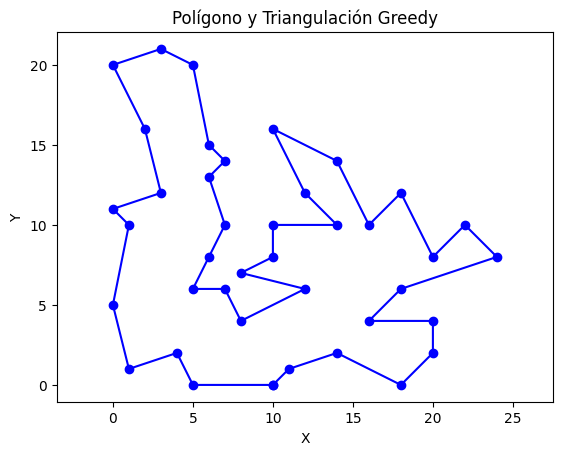

Triangulación completada en 0.0527329445 segundos.
Bordes seleccionados para la triangulación: [([10, 0], [18, 12]), ([10, 0], [16, 10]), ([10, 0], [14, 14]), ([10, 0], [14, 10]), ([10, 0], [12, 6]), ([10, 0], [8, 4]), ([10, 0], [5, 6]), ([10, 0], [0, 11]), ([10, 0], [1, 10]), ([10, 0], [0, 5]), ([10, 0], [4, 2]), ([11, 1], [16, 4]), ([11, 1], [18, 6]), ([11, 1], [20, 8]), ([11, 1], [18, 12]), ([11, 1], [16, 10]), ([11, 1], [14, 10]), ([11, 1], [12, 6]), ([11, 1], [8, 4]), ([11, 1], [5, 6]), ([11, 1], [1, 10]), ([11, 1], [0, 5]), ([11, 1], [4, 2]), ([11, 1], [5, 0]), ([14, 2], [20, 2]), ([14, 2], [20, 4]), ([14, 2], [16, 4]), ([14, 2], [18, 12]), ([14, 2], [16, 10]), ([14, 2], [14, 14]), ([14, 2], [14, 10]), ([14, 2], [10, 10]), ([14, 2], [12, 6]), ([14, 2], [8, 4]), ([14, 2], [0, 5]), ([14, 2], [4, 2]), ([14, 2], [5, 0]), ([18, 0], [20, 4]), ([18, 0], [16, 4]), ([18, 0], [10, 10]), ([18, 0], [10, 8]), ([18, 0], [12, 6]), ([20, 2], [16, 4]), ([20, 2], [10, 8]), ([20, 2], [8, 4]), ([20,

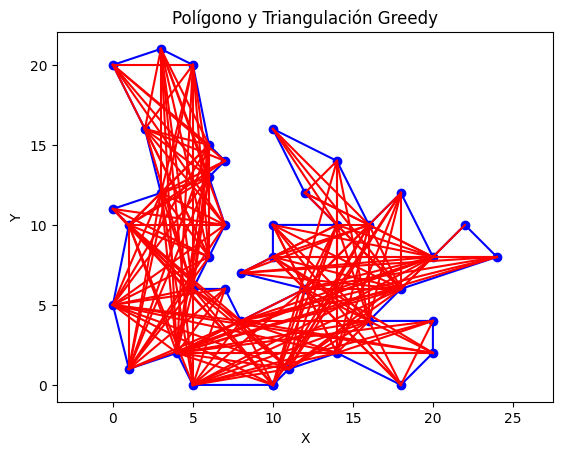

In [39]:
import itertools
import math
import matplotlib.pyplot as plt
import time

def distancia(p1, p2):
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

#Función encargada de indentificar desde que par de puntos se dara origen a las aristas de la triangulacion
def punto_dentro_poligono(punto, poligono):
    x, y = punto
    contador = 0
    n = len(poligono)
    for i in range(n):
        p1 = poligono[i]
        p2 = poligono[(i + 1) % n]
        if (p1[1] <= y < p2[1] or p2[1] <= y < p1[1]) and \
           (x < (p2[0] - p1[0]) * (y - p1[1]) / (p2[1] - p1[1]) + p1[0]):
            contador += 1
    return contador % 2 == 1
#Función encargada de
def segmento_dentro_poligono(p1, p2, poligono, divisiones=10):
    """Verifica si un segmento de línea está completamente dentro del polígono."""
    for i in range(1, divisiones):
        t = i / divisiones
        punto_intermedio = (p1[0] + t * (p2[0] - p1[0]), p1[1] + t * (p2[1] - p1[1]))
        if not punto_dentro_poligono(punto_intermedio, poligono):
            return False
    return True

def dibujar_poligono(puntos, triangulacion=None):
    puntos_ciclo = puntos + [puntos[0]]
    plt.plot(*zip(*puntos_ciclo), marker='o', color='b')
    if triangulacion:
        for borde in triangulacion:
            plt.plot([borde[0][0], borde[1][0]], [borde[0][1], borde[1][1]], 'r-')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Polígono y Triangulación Greedy')
    plt.axis('equal')
    plt.show()

def triangulacion_greedy(puntos):
    start_time = time.time()
    triangulacion = []
    n = len(puntos)
    for i in range(n):
        for j in range(i+2, n if i > 0 else n-1):
            p1 = puntos[i]
            p2 = puntos[j]
            # Verifica que el segmento de línea esté completamente dentro del polígono
            if segmento_dentro_poligono(p1, p2, puntos):
                triangulacion.append((p1, p2))
    end_time = time.time()
    execution_time = end_time - start_time
    print(f"Triangulación completada en {execution_time:.10f} segundos.")
    return triangulacion

# Ejemplo de uso
puntos = [[10,0],[11,1],[14,2],[18,0],[20,2],[20,4],[16,4],[18,6],[24,8],[22,10],[20,8],[18,12],[16,10],[14,14],[10,16],[12,12],[14,10],[10,10],[10,8],[8,7],[12,6],[8,4],[7,6],[5,6],[6,8],[7,10],[6,13],[7,14],[6,15],[5,20],[3,21],[0,20],[2,16],[3,12],[0,11],[1,10],[0,5],[1,1],[4,2],[5,0]]
print("Visualización del polígono sin triangulación:")
dibujar_poligono(puntos)

triangulacion_resultante = triangulacion_greedy(puntos)
print("Bordes seleccionados para la triangulación:", triangulacion_resultante)

print("Visualización del polígono con la triangulación resultante:")
dibujar_poligono(puntos, triangulacion_resultante)


In [ ]:
#points = [[10,0],[11,1],[14,2],[18,0],[20,2],[20,4],[16,4],[18,6],[24,8],[22,10],[20,8],[18,12],[16,10],[14,14],[10,16],[12,12],[14,10],[10,10],[10,8],[8,7],[12,6],[8,4],[7,6],[5,6],[6,8],[7,10],[6,13],[7,14],[6,15],[5,20],[3,21],[0,20],[2,16],[3,12],[0,11],[1,10],[0,5],[1,1],[4,2],[5,0]] # 40 puntos
#points = [[10,0],[11,1],[14,2],[18,0],[20,2],[16,4],[18,6],[24,8],[22,10],[20,8],[18,12],[16,10],[14,14],[10,16],[12,12],[14,10],[10,10],[10,8],[8,7],[12,6],[8,4],[7,6],[5,6],[6,8],[7,10],[6,13],[7,14],[6,15],[5,20],[3,21],[0,20],[2,16],[3,12],[0,11],[1,10],[0,5],[1,1],[4,2],[5,0]] # 39 puntos
#points = [[10,0],[11,1],[14,2],[18,0],[20,2],[16,4],[18,6],[24,8],[22,10],[20,8],[18,12],[16,10],[14,14],[10,16],[12,12],[14,10],[10,10],[10,8],[8,7],[12,6],[8,4],[7,6],[5,6],[6,8],[7,10],[6,13],[7,14],[6,15],[5,20],[3,21],[0,20],[2,16],[3,12],[0,11],[1,10],[0,5],[1,1],[4,2]] # 38 puntos
#points = [[10,0],[11,1],[14,2],[18,0],[20,2],[16,4],[18,6],[24,8],[22,10],[20,8],[18,12],[16,10],[14,14],[10,16],[12,12],[14,10],[10,8],[8,7],[12,6],[8,4],[7,6],[5,6],[6,8],[7,10],[6,13],[7,14],[6,15],[5,20],[3,21],[0,20],[2,16],[3,12],[0,11],[1,10],[0,5],[1,1],[4,2]] # 37 puntos
#points = [[10,0],[11,1],[14,2],[18,0],[20,2],[16,4],[18,6],[24,8],[22,10],[20,8],[18,12],[16,10],[14,14],[10,16],[12,12],[14,10],[10,8],[8,7],[12,6],[8,4],[7,6],[5,6],[6,8],[7,10],[6,13],[7,14],[6,15],[5,20],[0,20],[2,16],[3,12],[0,11],[1,10],[0,5],[1,1],[4,2]] # 36 puntos
#points = [[10,0],[11,1],[14,2],[18,0],[20,2],[16,4],[18,6],[24,8],[22,10],[20,8],[18,12],[16,10],[14,14],[10,16],[12,12],[14,10],[10,8],[8,7],[12,6],[8,4],[7,6],[5,6],[6,8],[7,10],[6,13],[7,14],[6,15],[5,20],[0,20],[2,16],[3,12],[1,10],[0,5],[1,1],[4,2]] # 35 puntos
#points = [[10,0],[11,1],[14,2],[18,0],[20,2],[16,4],[18,6],[24,8],[22,10],[20,8],[18,12],[16,10],[14,14],[10,16],[12,12],[14,10],[10,8],[8,7],[12,6],[8,4],[7,6],[5,6],[6,8],[7,10],[6,13],[7,14],[6,15],[5,20],[0,20],[2,16],[3,12],[1,10],[0,5],[4,2]] # 34 puntos
#points = [[10,0],[11,1],[14,2],[18,0],[20,2],[16,4],[18,6],[24,8],[22,10],[20,8],[18,12],[16,10],[14,14],[10,16],[12,12],[14,10],[10,8],[8,7],[12,6],[8,4],[7,6],[5,6],[6,8],[7,10],[6,13],[7,14],[6,15],[0,20],[2,16],[3,12],[1,10],[0,5],[4,2]] # 33 puntos
#points = [[10,0],[11,1],[14,2],[18,0],[20,2],[16,4],[18,6],[24,8],[22,10],[20,8],[18,12],[16,10],[14,14],[10,16],[12,12],[14,10],[10,8],[8,7],[12,6],[8,4],[7,6],[5,6],[6,8],[7,10],[6,13],[7,14],[6,15],[0,20],[2,16],[3,12],[2,10],[4,2]] # 32 puntos
#points = [[10,0],[11,1],[14,2],[18,0],[20,2],[16,4],[18,6],[24,8],[22,10],[20,8],[18,12],[16,10],[14,14],[10,16],[12,12],[14,10],[10,8],[8,8],[12,6],[8,4],[7,6],[6,8],[7,10],[6,13],[7,14],[6,15],[0,20],[2,16],[3,12],[0,7],[4,2]] # 31 puntos
#points = [[10,0],[11,1],[14,2],[18,0],[20,2],[16,4],[18,6],[24,8],[22,10],[20,8],[18,12],[16,10],[14,14],[10,16],[12,12],[14,10],[10,8],[8,8],[12,6],[8,4],[7,6],[5,6],[6,8],[7,10],[6,13],[7,14],[6,15],[0,20],[2,10],[4,2]] # 30 puntos
#points = [[1,1],[3,0],[6,1],[5,2],[7,2],[8,3],[6,4],[5,5],[7,6],[8,7],[7,8],[9,9],[8,10],[7,10],[6,11],[5,10],[6,9],[5,8],[4,9],[3,8],[3,6],[2,7],[1,6],[2,5],[4,4],[2,3],[2,2],[1,3],[0,2]] # 29 puntos
#points = [[1,1],[3,0],[6,1],[5,2],[7,2],[8,3],[6,4],[5,5],[7,6],[8,7],[7,8],[9,9],[8,10],[6,11],[5,10],[6,9],[5,8],[4,9],[3,8],[3,6],[2,7],[1,6],[2,5],[4,4],[2,3],[2,2],[1,3],[0,2]] # 28 puntos
#points = [[1,1],[3,0],[6,1],[5,2],[7,2],[8,3],[6,4],[5,5],[7,6],[8,7],[7,8],[8,10],[6,11],[5,10],[6,9],[5,8],[4,9],[3,8],[3,6],[2,7],[1,6],[2,5],[4,4],[2,3],[2,2],[1,3],[0,2]] # 27 puntos
#points = [[1,1],[3,0],[6,1],[5,2],[7,2],[8,3],[6,4],[7,6],[8,7],[7,8],[8,10],[6,11],[5,10],[6,9],[5,8],[4,9],[3,8],[3,6],[2,7],[1,6],[2,5],[4,4],[2,3],[2,2],[1,3],[0,2]] # 26 puntos
#points = [[1,1],[3,0],[6,1],[5,2],[7,2],[8,3],[7,6],[8,7],[7,8],[8,10],[6,11],[5,10],[6,9],[5,8],[4,9],[3,8],[3,6],[2,7],[1,6],[2,5],[4,4],[2,3],[2,2],[1,3],[0,2]] # 25 puntos
#points = [[1,1],[3,0],[6,1],[5,2],[7,2],[8,3],[7,6],[8,7],[7,8],[8,10],[6,11],[5,10],[6,9],[5,8],[4,9],[3,8],[3,6],[2,7],[1,6],[2,5],[4,4],[2,3],[2,2],[1,2]] # 24 puntos
#points = [[5,2],[5,1],[8,1.5],[11,2],[14,5],[16,4],[20,6],[17,11],[15,10],[13,8],[12,5],[10,6],[8,8],[11,10],[12,11],[6,12],[5,11],[7,9],[5,8],[3,7],[2,10],[2,6],[3,1]] # 23 puntos
#points = [[5,2],[5,1],[8,1.5],[11,2],[14,5],[16,4],[20,6],[17,11],[15,10],[13,8],[10,6],[8,8],[11,10],[12,11],[6,12],[5,11],[7,9],[5,8],[3,7],[2,10],[2,6],[3,1]] # 22 puntos
#points = [[5,2],[5,1],[8,1.5],[11,2],[14,5],[16,4],[20,6],[17,11],[15,10],[13,8],[10,6],[8,8],[11,10],[12,11],[6,12],[5,11],[7,9],[5,8],[2,10],[2,6],[3,1]] # 21 puntos
#points = [[5,2],[5,1],[8,1.5],[11,2],[14,5],[16,4],[20,6],[15,10],[13,8],[10,6],[8,8],[11,10],[12,11],[6,12],[5,11],[7,9],[5,8],[2,10],[2,6],[3,1]] # 20 puntos
#points = [[5,2],[5,1],[8,1.5],[11,2],[14,5],[20,6],[15,10],[13,8],[10,6],[8,8],[11,10],[12,11],[6,12],[5,11],[7,9],[5,8],[2,10],[2,6],[3,1]] # 19 puntos
#points = [[5,2],[7,1],[11,2],[14,5],[20,6],[15,10],[13,8],[10,6],[8,8],[11,10],[12,11],[6,12],[5,11],[7,9],[5,8],[2,10],[2,6],[3,1]] # 18 puntos
#points = [[5,2],[11,2],[14,5],[20,6],[15,10],[13,8],[10,6],[8,8],[11,10],[12,11],[6,12],[5,11],[7,9],[5,8],[2,10],[2,6],[3,1]] # 17 puntos
#points = [[1,1],[3,0],[5,1],[7,1.25],[8,3],[7,5],[6,4],[5,5],[3,7],[1.5,6],[1,5],[2,4.5],[3,4],[3,2],[2,2],[0,3]] # 16 puntos
#points = [[1,1],[3,0],[5,1],[7,1.25],[8,3],[7,4],[5,5],[3,7],[1.5,6],[1,5],[2,4.5],[3,4],[3,2],[2,2],[0,3]] # 15 puntos
#points = [[1,1],[3,0],[5,1],[8,3],[7,4],[5,5],[3,7],[1.5,6],[1,5],[2,5],[2,4],[3,3],[2,2],[0,3]] # 14 puntos
#points = [[1,1],[3,0],[5,1],[8,3],[7,4],[5,5],[3,7],[1,5],[2,4.5],[3,4],[3,3],[2,3],[1,3]] # 13 puntos
#points = [[1,1],[3,0],[5,1],[6,3],[5,5],[3,7],[1,5],[2,4.5],[3,4],[3,3],[2,3],[1,3]] # 12 puntos
#points = [[1,1],[3,0],[5,1],[6,3],[5,5],[3,7],[1,5],[3,4],[3,3],[2,3],[1,3]] # 11 puntos
#points = [[1,1],[5,1],[6,3],[5,5],[3,7],[1,5],[3,4],[3,3],[2,3],[1,3]] # 10 puntos
#points = [[1,1],[5,1],[6,3],[5,5],[3,7],[1,5],[3,4],[3,3],[2,3]] # 9 puntos
#points = [[1,1],[5,1],[6,3],[5,5],[1,5],[3,4],[3,3],[2,3]] # 8 puntos
#points = [[1,1],[5,1],[5,5],[3,7],[1,5],[3,3],[2,3]] # 7 puntos
#points = [[1,1],[5,1],[5,5],[3,7],[1,5],[2,3]] # 6 puntos
#points = [[1,1],[5,1],[5,5],[1,5],[3,3]] # 5 puntos
#points = [[1,1],[5,1],[4,3],[1,5]] # 4 puntos
#points = [[1,1],[5,1],[3,3]] # 3 puntos